In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd '/content/drive/MyDrive/IRWAProject/MovieRecommendation/'

/content/drive/MyDrive/IRWAProject/MovieRecommendation


In [4]:
import os
import pandas as pd


In [5]:
cwd =  os.getcwd()
cwd

'/content/drive/MyDrive/IRWAProject/MovieRecommendation'

In [6]:

import zipfile
zip_file = '/content/drive/MyDrive/IRWAProject/MovieRecommendation/data/data1.zip'


extraction_path = '/content/drive/My Drive/IRWAProject/MovieRecommendation/data'

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [7]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#import data set
movies=pd.read_csv(extraction_path +"/movies.csv")


In [9]:
ratings=pd.read_csv(extraction_path +"/ratings.csv")

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [12]:
# display the shape of the movies
movies.shape

(34208, 3)

In [13]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435


In [14]:
# display the shape of the reviews
ratings.shape

(22884377, 4)

In [15]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

**Data Preprocessing**

In [16]:
# check are there any null values of movies data set
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [17]:
# check are there any null values of rating data set
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [18]:
#cording to the respective user ID get rating value count
ratings['userId'].value_counts()

185430    9281
46750     7515
204165    7057
135877    6015
58040     5801
          ... 
127573       1
180933       1
200783       1
180936       1
154112       1
Name: userId, Length: 247753, dtype: int64

In [19]:
ratings['userId'].unique().shape

(247753,)

In [20]:
#filtered number of users given more than 150 ratings
filtered_user = ratings['userId'].value_counts() >  150

In [21]:
filtered_user[filtered_user].shape

(38462,)

In [22]:
y= filtered_user[filtered_user].index

In [23]:
y

Int64Index([185430,  46750, 204165, 135877,  58040,  94166,  16382, 246533,
             49237, 239662,
            ...
             29382, 224356, 150377, 243750,  74033, 128050, 142521, 102002,
            189341,  46529],
           dtype='int64', length=38462)

In [24]:
#figure out the user ID with rating according to the filtered indexes
ratings = ratings[ratings['userId'].isin(y)]

In [25]:
ratings.head()

,userId,movieId,rating,timestamp
11,4,16,4.0,1037740142
12,4,39,4.0,1037740562
13,4,45,4.0,1037808019
14,4,47,2.0,1037739998
15,4,94,5.0,1037740486


In [26]:
ratings.shape

(15209161, 4)

In [27]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


In [28]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15209161 entries, 11 to 22884321
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 580.2 MB


In [29]:
#merge the movies data set and rating data set
ratings_with_movies = ratings.merge(movies, on='movieId')

In [30]:
ratings_with_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,4,16,4.0,1037740142,Casino (1995),Crime|Drama
1,34,16,3.0,1086265729,Casino (1995),Crime|Drama
2,47,16,4.5,1150032511,Casino (1995),Crime|Drama
3,75,16,3.0,1121049862,Casino (1995),Crime|Drama
4,106,16,4.5,1295942149,Casino (1995),Crime|Drama


In [31]:
ratings_with_movies.shape

(15209161, 6)

In [32]:
#get how many ratings for the particular movie
number_rating = ratings_with_movies.groupby('title')['rating'].count().reset_index()

In [33]:
number_rating.head()

,title,rating
0,"""Great Performances"" Cats (1998)",59
1,#1 Cheerleader Camp (2010),3
2,#chicagoGirl: The Social Network Takes on a Di...,2
3,$ (Dollars) (1971),13
4,$5 a Day (2008),20


In [34]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [35]:
number_rating.head()

,title,num_of_rating
0,"""Great Performances"" Cats (1998)",59
1,#1 Cheerleader Camp (2010),3
2,#chicagoGirl: The Social Network Takes on a Di...,2
3,$ (Dollars) (1971),13
4,$5 a Day (2008),20


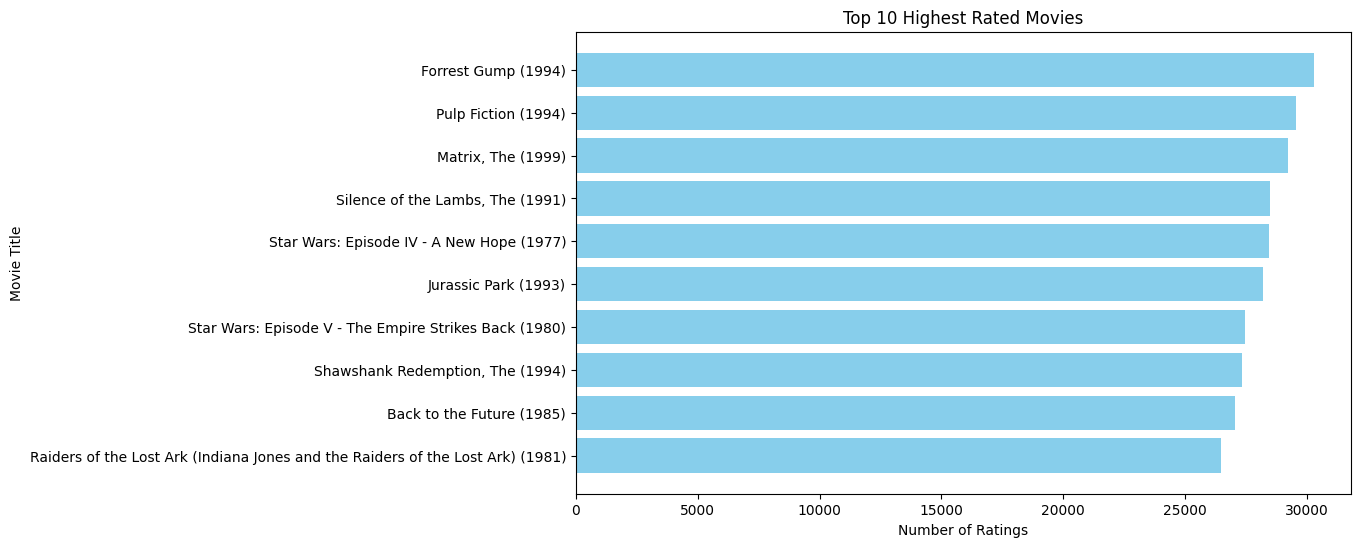

In [36]:
import matplotlib.pyplot as plt

# Assuming you have already created the 'number_rating' DataFrame
# Sort the DataFrame by rating count in descending order
sorted_ratings = number_rating.sort_values(by='num_of_rating', ascending=False)

# Select the top N movies with the highest ratings, for example, top 10
top_n = 10
top_movies = sorted_ratings.head(top_n)

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(top_movies['title'], top_movies['num_of_rating'], color='skyblue')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title(f'Top {top_n} Highest Rated Movies')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Show the plot
plt.show()


In [37]:
#merge the rating_with_movies data set and number_rating data set
movie_rating = ratings_with_movies.merge(number_rating, on='title')

In [38]:
movie_rating.head()

,userId,movieId,rating,timestamp,title,genres,num_of_rating
0,4,16,4.0,1037740142,Casino (1995),Crime|Drama,11269
1,34,16,3.0,1086265729,Casino (1995),Crime|Drama,11269
2,47,16,4.5,1150032511,Casino (1995),Crime|Drama,11269
3,75,16,3.0,1121049862,Casino (1995),Crime|Drama,11269
4,106,16,4.5,1295942149,Casino (1995),Crime|Drama,11269


In [39]:
movie_rating.shape

(15209161, 7)

In [40]:
#get those movies which got at least 50 rating of user
movie_rating = movie_rating[movie_rating['num_of_rating'] >= 200]

In [41]:
movie_rating.head()

,userId,movieId,rating,timestamp,title,genres,num_of_rating
0,4,16,4.0,1037740142,Casino (1995),Crime|Drama,11269
1,34,16,3.0,1086265729,Casino (1995),Crime|Drama,11269
2,47,16,4.5,1150032511,Casino (1995),Crime|Drama,11269
3,75,16,3.0,1121049862,Casino (1995),Crime|Drama,11269
4,106,16,4.5,1295942149,Casino (1995),Crime|Drama,11269


In [42]:
movie_rating.shape

(14588546, 7)

In [43]:
#drop the duplicates values
movie_rating.drop_duplicates(['userId','title'],inplace=True)

In [44]:
movie_rating.shape

(14588197, 7)

In [45]:
#create a pivot table
movie_pivot = movie_rating.pivot_table(columns='userId', index='title', values= 'rating')

In [46]:
movie_pivot

userId,4,13,15,17,20,21,34,37,38,39,...,247702,247704,247705,247710,247725,247730,247732,247734,247735,247751
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN
*batteries not included (1987),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[REC]² (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4.0,NaN


In [47]:
movie_pivot.shape

(6773, 38462)

In [48]:
#replace 0 for Nan values
movie_pivot.fillna(0, inplace=True)

In [49]:
movie_pivot

userId,4,13,15,17,20,21,34,37,38,39,...,247702,247704,247705,247710,247725,247730,247732,247734,247735,247751
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
*batteries not included (1987),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[REC]² (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0


**Training Model**

In [50]:
from scipy.sparse import csr_matrix

In [51]:
movie_sparse = csr_matrix(movie_pivot)

In [52]:
type(movie_sparse)

scipy.sparse._csr.csr_matrix

In [53]:
# Now import our clustering algoritm which is Nearest Neighbors this is an unsupervised ml algorithm
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

In [54]:
model.fit(movie_sparse)

NearestNeighbors(algorithm='brute')

In [55]:
distance, suggestion = model.kneighbors(movie_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )

In [56]:
distance

array([[  0.        , 137.48181698, 137.70983988, 138.25339056,
        138.81012211, 138.81282362]])

In [57]:
suggestion

array([[ 237, 6508, 1090,  238, 6097,  672]])

In [58]:
movie_pivot.iloc[241,:]

userId
4         0.0
13        0.0
15        0.0
17        0.0
20        0.0
         ... 
247730    0.0
247732    0.0
247734    0.0
247735    0.0
247751    0.0
Name: All That Heaven Allows (1955), Length: 38462, dtype: float64

In [59]:
for i in range(len(suggestion)):
    print(movie_pivot.index[suggestion[i]])

Index(['All Dogs Go to Heaven (1989)', 'We're Back! A Dinosaur's Story (1993)',
       'Care Bears Movie, The (1985)', 'All Dogs Go to Heaven 2 (1996)',
       'Thumbelina (1994)', 'Benji the Hunted (1987)'],
      dtype='object', name='title')


In [60]:
movie_pivot.index[3]

'(500) Days of Summer (2009)'

In [61]:
#keeping movies name
movie_names = movie_pivot.index

In [62]:
movie_names[2]

"'night Mother (1986)"

In [63]:
np.where(movie_pivot.index == 'Adventures of Elmo in Grouchland, The (1999)')[0][0]

160

**Testing model**

In [64]:
def recommend_movie(movie_name, n_neighbors=10):
    movie_id = np.where(movie_pivot.index == movie_name)[0][0]
    distance, suggestion = model.kneighbors(movie_pivot.iloc[movie_id, :].values.reshape(1, -1), n_neighbors=n_neighbors)

    recommended_movies = []

    for i in range(len(suggestion)):
        movies = movie_pivot.index[suggestion[i]]
        for j in movies:
            if j != movie_name:
                recommended_movies.append(j)

    return recommended_movies

In [65]:
movie_name = "All Dogs Go to Heaven (1989)"
recommend_movie(movie_name, n_neighbors=6)

["We're Back! A Dinosaur's Story (1993)",
 'Care Bears Movie, The (1985)',
 'All Dogs Go to Heaven 2 (1996)',
 'Thumbelina (1994)',
 'Benji the Hunted (1987)']

In [69]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score

# Define a function to calculate precision and recall
def calculate_precision_recall(actual, recommended):
    # Calculate true positives, false positives, and false negatives
    true_positives = len(set(actual) & set(recommended))
    false_positives = len(recommended) - true_positives
    false_negatives = len(actual) - true_positives

    # Calculate precision and recall
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    return precision, recall

# Define the actual user preferences
actual_preferences = ["We're Back! A Dinosaur's Story (1993)", "Harry Potter","Care Bears Movie, The (1985)","Benji the Hunted (1987)"]
# Call the recommend_movie function to get movie recommendations
recommended_movies = recommend_movie("All Dogs Go to Heaven (1989)", n_neighbors=6)  # Change n_neighbors as needed

# Calculate precision and recall
precision, recall = calculate_precision_recall(actual_preferences, recommended_movies)

# Print the precision and recall
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.6
Recall: 0.75
